Simulate the time - evolution of this system 

Process of writing code:
1. define parameters
2. construct hamiltonian
3. include dissipation via the lindblad master equation
4. solve the dynamics starting from the vacuum state
5. plot the wigner function for mode a

/opt/conda/lib/python3.11/site-packages/equinox/_module.py:1096: UserWarning: A `SparseDIAQArray` has been converted to a `DenseQArray` while computing its matrix exponential.
  return self.__func__(self.__self__, *args, **kwargs)
|██████████| 100.0% ◆ elapsed 17.57ms ◆ remaining 0.00ms
100%|██████████| 50/50 [00:04<00:00, 12.07it/s]


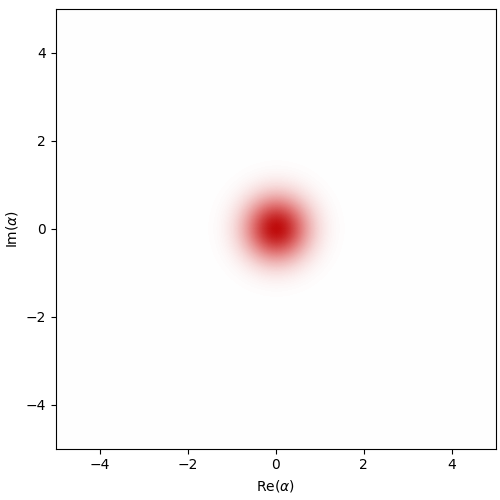

: 

In [31]:
#Import 
import dynamiqs as dq
import scipy as sp
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt
import scipy.constants
jax.devices()

#Annihilaration
na, nb = 10, 10
a = dq.tensor(dq.destroy(na), dq.eye(nb))
adag = dq.dag(a)
b = dq.tensor(dq.eye(na), dq.destroy(nb))
bdag = dq.dag(b)

#Parameters
ω_a0 = 2*jnp.pi*5.26
ω_b0 = 2*jnp.pi*7.70
φ_a = 0.06
φ_b = 0.29
Ka = 9.3
Kb = 10
E_J = 42.76e3
ΔE_J = 0.47e3
ω_d = 2*jnp.pi*7.623
ω_p = 2*jnp.pi*2.891
ϵ_d = -2*jnp.pi*3.815*1e-3
ϵ_p = 0.122

T = 3e-3
t_save = jnp.linspace(0, T, 100) 


#Equations
phi_hat = φ_a * (a + dq.dag(a)) + φ_b * (b + dq.dag(b))
H_0 = ω_a0* dq.dag(a) @ a + ω_b0* dq.dag(b) @ b 
H_ATS = dq.modulated(lambda t: -2* E_J*(jnp.sin(ϵ_p * jnp.cos(ω_d * t))), dq.sinm(phi_hat)) + dq.modulated(lambda t : 2 * ΔE_J * jnp.cos(ϵ_p * jnp.cos(ω_d * t)), dq.cosm(phi_hat))
H_d = dq.modulated(lambda t: 2 * ϵ_d * jnp.cos(ω_d * t), (b + dq.dag(b)))
H = H_0 + H_ATS + H_d 


psi0 = dq.fock((na,nb), (0,0)) 
res = dq.mesolve(H, [jnp.sqrt(Kb)*b], psi0, t_save)
trace_a = dq.ptrace(res.states, 0,res.states.dims) 
dq.plot.wigner_gif(trace_a, fps=60)